In [37]:
import pandas as pd # Data manipulation and reading CSV files
import numpy as np # For mathematical and matrix operations
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split # Splitting the data into train and test sets
from sklearn.preprocessing import StandardScaler # Feature scaling using z-score normalization
from sklearn.ensemble import GradientBoostingRegressor # Powerful ensemble learning model for regression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # Performance evaluation metrics
import joblib # For saving the trained model and assets to a file

# To display plots within the Jupyter Notebook
%matplotlib inline

# Set the visualization style
sns.set(style="whitegrid")

In [38]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [40]:
print(df.isnull().sum())

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64


In [41]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


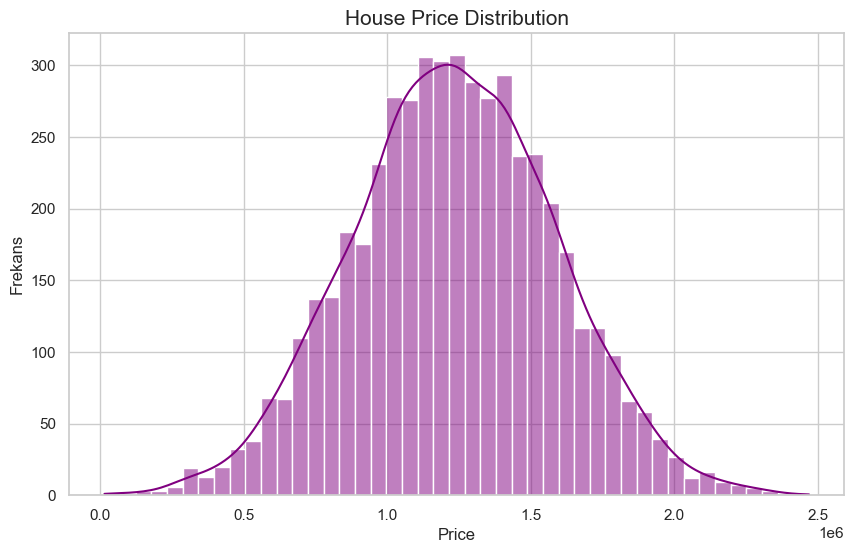

In [42]:
plt.figure(figsize=(10,6))

sns.histplot(df['Price'],kde=True,color='purple')
#kde = adds density line
#histplot = bar chart

plt.title('House Price Distribution',fontsize=15)
plt.xlabel('Price',fontsize=12)
plt.ylabel('Frekans',fontsize=12)

plt.show()

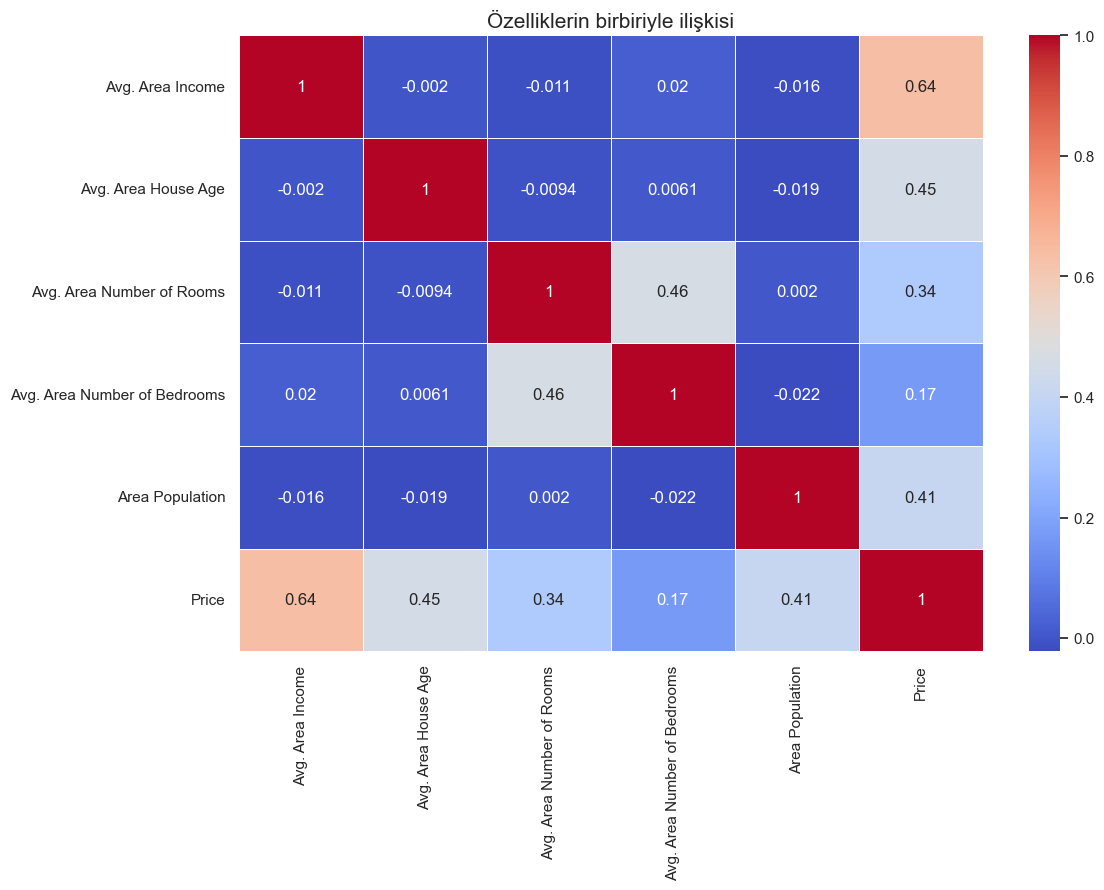

In [43]:
corr_matrix=df.drop('Address',axis=1).corr()
# We dropped the address column because it's not numeric, and we're calculating the correlation.
# The CORR method calculates the mathematical relationship between columns (-1, 1).


plt.figure(figsize=(12,8))

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
#coolwarm = indicates low relations in blue and high relations in red.
#annot true = Numerical values ​​are entered into the boxes.

plt.title('Özelliklerin birbiriyle ilişkisi',fontsize=15)
plt.show()


In [44]:
# Calculate Correlation Matrix (excluding Address column)
corr_matrix = df.drop('Address', axis=1).corr()

# Only take the effects from the 'Price' column and sort them from largest to smallest.
price_correlations = corr_matrix['Price'].sort_values(ascending=False)

print("correlation between features and price")

for feature, value in price_correlations.items():
    # Price shows 1.0000 because its correlation with itself is 100%.
    status = "Very Strong" if value > 0.7 else "Strong" if value > 0.4 else "Medium/Weak"
    print(f"{feature:<30} : {value:>8.4f} {status}")



correlation between features and price
Price                          :   1.0000 Very Strong
Avg. Area Income               :   0.6397 Strong
Avg. Area House Age            :   0.4525 Strong
Area Population                :   0.4086 Strong
Avg. Area Number of Rooms      :   0.3357 Medium/Weak
Avg. Area Number of Bedrooms   :   0.1711 Medium/Weak


In [45]:
#Feature Engineering
# 1. Relationship Between Income and House Age: Generally, areas with both high income and older houses are more expensive.
df['Income_Age_Interact'] = df['Avg. Area Income']*df['Avg. Area House Age']

# 2. Revenue Per Room: The ratio of the financial power of people in the area to the number of rooms available.
df['Income_per_Room'] = df['Avg. Area Income'] / df['Avg. Area Number of Rooms']

#3. Total Rooms Per Bedroom: An indicator of the home's spaciousness.
df['Rooms_per_Bedroom'] = df['Avg. Area Number of Rooms'] / df['Avg. Area Number of Bedrooms']

print("added new features")
df.head()


added new features


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Income_Age_Interact,Income_per_Room,Rooms_per_Bedroom
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",452045.809842,11348.740675,1.713738
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",475721.660598,11773.993430,2.178259
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",359503.184706,7199.463119,1.659401
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,455340.540916,11338.520957,1.713720
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,302343.535532,7651.387949,1.853283


In [46]:
#data the model will learn
#price will learn, we dropped it, and since address is text, we removed it.
x=df.drop(['Price','Address'],axis=1)

#y = target of the model
y=df['Price']

print('Independent variables (x) and target (y) were separated.')

Independent variables (x) and target (y) were separated.


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(y_train.shape)

(4000, 8)
(4000,)


In [48]:
#Normalization
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print('datas scaled.')

datas scaled.


In [49]:
#Hyperparameter scaling (of model)
model = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    random_state=42
)
print("model configuration is completed")

model configuration is completed


In [50]:
model.fit(x_train_scaled,y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",1000
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",0.8
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",4
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in thelef

In [51]:
train_pred = model.predict(x_train_scaled)
test_pred = model.predict(x_test_scaled)

train_r2 = r2_score(y_train,train_pred)
test_r2 = r2_score(y_test,test_pred)

print(f"Train R2: %{train_r2*100:.2f}")
print(f"Test R2: %{test_r2*100:.2f}")

Train R2: %97.44
Test R2: %90.41


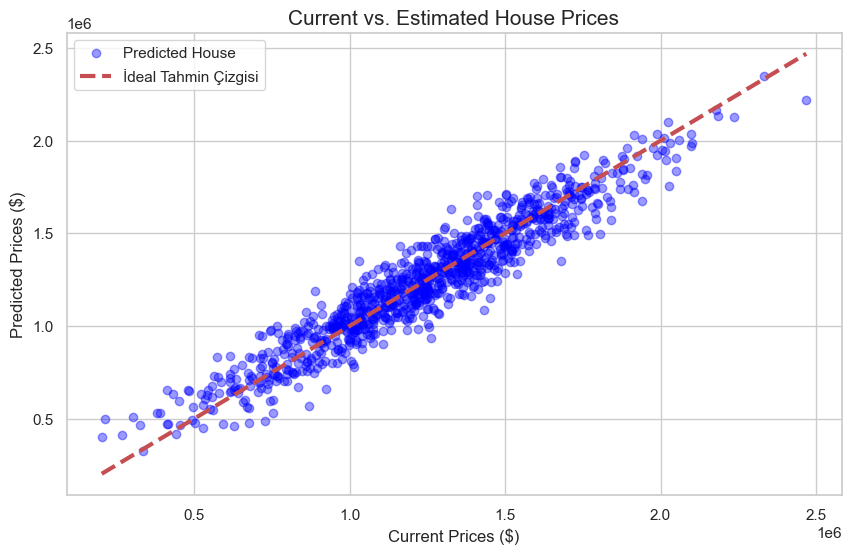

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,test_pred,color='blue',alpha=0.4,label='Predicted House')
#Actual values ​​are on the x-axis, estimates are on the y-axis

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3, label='İdeal Tahmin Çizgisi')

plt.xlabel('Current Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.title('Current vs. Estimated House Prices', fontsize=15)
plt.legend()
plt.show()


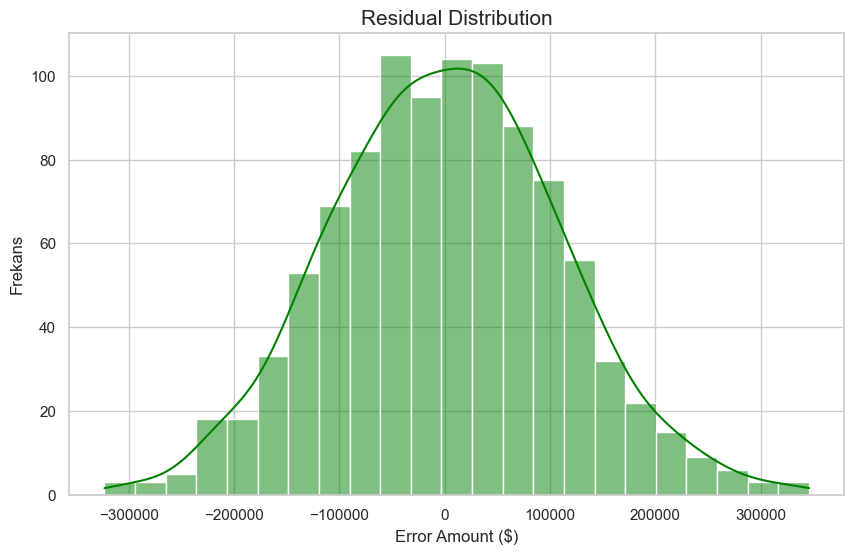

In [53]:
hatalar = y_test - test_pred # We are calculating the residuals.

plt.figure(figsize=(10, 6))
# We plot the distribution of errors (Histogram + KDE)
sns.histplot(hatalar, kde=True, color='green')
plt.title('Residual Distribution', fontsize=15)
plt.xlabel('Error Amount ($)')
plt.ylabel('Frekans')
plt.show()


C:\Users\berat\AppData\Local\Temp\ipykernel_23524\863586565.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')


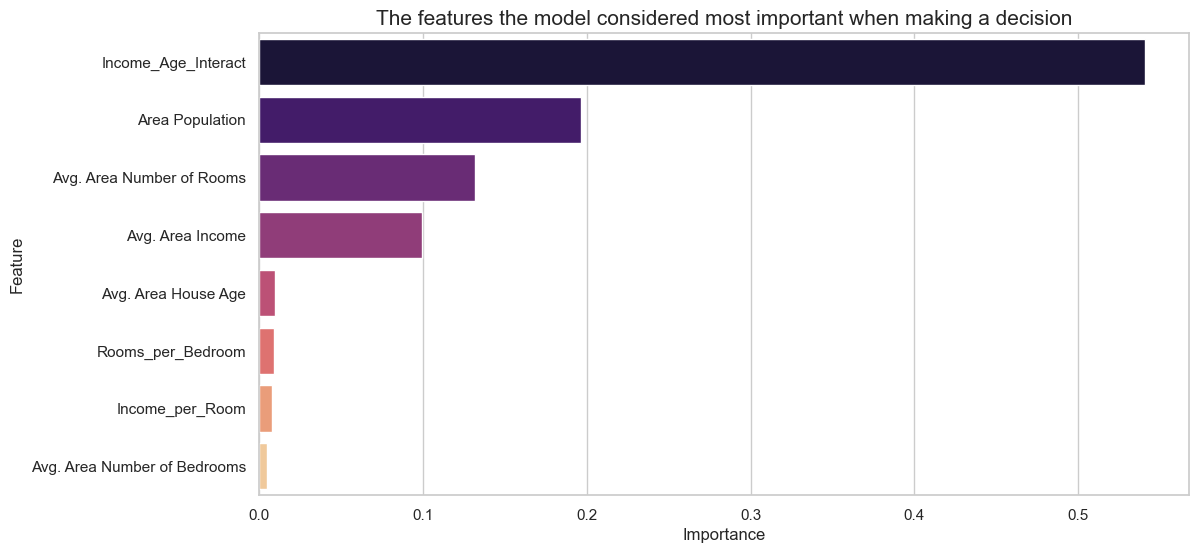

In [54]:
importances = model.feature_importances_
feature_names = x.columns # The column names we created when allocating X variables


# We place the data in a DataFrame and sort it.
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('The features the model considered most important when making a decision', fontsize=15)
plt.show()

In [55]:
# 1. We record our trained model.
joblib.dump(model, 'house_prediction_model.pkl')

# 2. We save the scaler object that we use to scale the data. 
# (In Streamit, we should scale the data coming from the user in the same way!)
joblib.dump(scaler, 'scaler.pkl')

# 3. We record the column names that the model expects in order.
joblib.dump(x.columns.tolist(), 'features.pkl')

print("Lists successfully saved")

Lists successfully saved
